In [8]:
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from os.path import join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
with open(join('data', 'census.pkl'), 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

X_train.shape, X_test.shape

((27676, 108), (4885, 108))

In [10]:
y_train.shape, y_test.shape

((27676,), (4885,))

In [11]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
previsoes = naive_model.predict(X_test)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [12]:
y_test

22278     <=50K
8950      <=50K
7838      <=50K
16505     <=50K
19140      >50K
          ...  
28592     <=50K
17008     <=50K
25123     <=50K
21036     <=50K
13998     <=50K
Name: income, Length: 4885, dtype: object

In [13]:
accuracy_score(y_test, previsoes) # não executar o escalonamento

# Era melhor jogar uma moeda de decidir pelo resultado

0.4767656090071648

0.4767656090071648

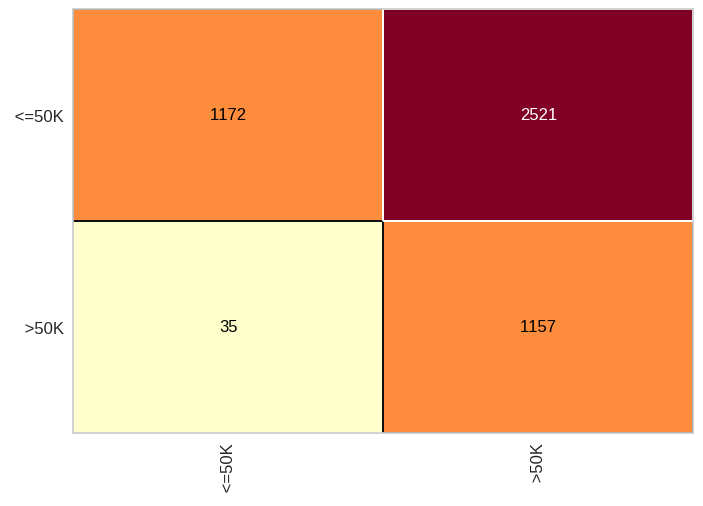

In [14]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [15]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

